# Estado del arte

Los procesos que se ejecutan para reconocer un rostro son de manera general cuatro:

- Detectar 
- Alinear  
- Frontalizar 
- Clasificar

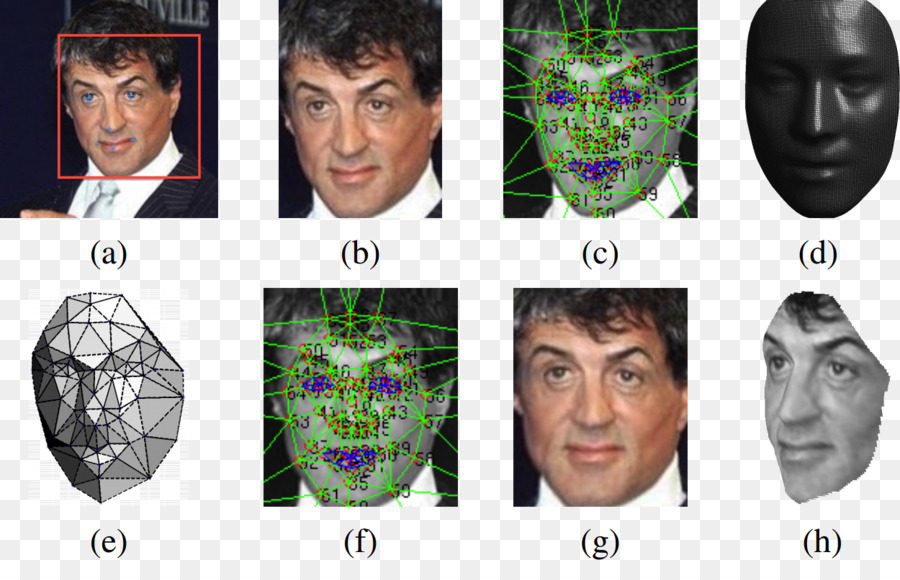

Para detectar el rostro en la imagen se utiliza un detector de puntos caracteristicos de una cara (ubicados en los ojos, la nariz y los labios), el cual se aplica a la imagen más de una vez para ir refinando el output de este detector hasta obtener una imagen como la imagen (a), al transformar la imagen usando la matriz de similitud inducida a una nueva imagen a la cual se le aplica el detector otra vez y así ir refinando la localización de los puntos, en cada iteración los puntos son extraidos a través de un regresor de vectores entrenado para poder predecir en que lugar están estos puntos faciales desde un descriptor de imagen, el descriptor de imagen utilizado en el paper está basado en el local binary patterns (LBP).

El proceso de alinear se lleva a cabo en dos partes, una alineación del rostro en 2D y luego utilizando un modelo 3D genérico podemos utilizar los puntos faciales como puntos de anclaje para así tener un modelo 3D del rostro que fue detectado en la fase previa.

La alineación en 2D se obtiene luego de obtener estos 6 puntos faciales, los cuales son utilizados como puntos de anclaje, la imagen alineada viene dada por $T_{2D}$, la cual se obtiene iterando y prediciendo la posición de estos puntos faciales ajustando los coeficientes de la matriz $T^{i}_{2D}:=(s_{i},R_{i},t_{i})$, donde $s_{i},R_{i},t_{i}$ son coeficientes de escala, rotación y traslación respectivamente, mediante la siguiente definición $x^{j}_{anchor}=s_{i}[R_{i}|t_{i}]*x^{j}_{source}$, donde finalmente la matriz $T_{2D}$ viene dada por  $T_{2D} = T^{1}_{2D}*T^{2}_{2D}*.....*T^{k}_{2D}$, obteniendo la figura (b).

En cuanto a la alineación 3D, utilizada para rotar el rostro encontrado en los pasos anteriores en caso de no estar de manera tan frontal en la imagen, se parte con un modelo genérico 3D de un rostro para luego deformar el rostro en 2D obtenido en el paso anterior con la forma del modelo genérico y así finalmente obtener una imagen del rostro más frontal como se ve en la imagen (g). Esto se logra localizando 67 puntos faciales además de los ya encontrados en la imagen alineada en 2D utilizando un segundo regresor de vectores para estos nuevos puntos, como se puede ver en la imagen (c), como se utiliza en este caso un modelo genérico tenemos que simplemente buscar los promedios de las posiciones de estos puntos faciales en el rostro 3D, estos se obtienen del USF Human-ID database representados como vértices de la forma $v_{i}=(x_{i},y_{i},z_{i})_{i=1}^{n}$, de esta manera se ubican manualmente estos 67 puntos faciales obtenidos en el modelo 3D.

Para la frontalización en primer lugar se transforma este modelo 3D a 2D, a través utilizando una matriz P la cual actuará como una cámara la cual estará determinada por la solución con minimos cuadrados del siguiente sistema $x_{2d} = x_{3d}\vec{P}$, donde la matriz $\vec{P}$ es la matriz que minimiza, con una matriz covarianza conocida $\sum$, la perdida siguiente: $loss(\vec{P})=r^{T}\sum^{-1} r$, donde $r = (x_{2d}-x_{3d}\vec{P}) $, luego de tener esta transformación de 3D a 2D, la frontalización se logra con una transformación por partes de $x_{2d(source)}$ a $x_{3d(target)}$ dirigida
por la triangulación de Delaunay derivada de los 67 puntos faciales localizados, esto genera pequeñas deformaciones para ajustar el modelo 2D, aunque sin estas se podrian perder rasgos importantes del rostro a estudiar.

Para poder clasificar el rostro se utiliza una red neuronal, la cual es entrenada para cumplir con la tarea de clasificar la identidad de un rostro, la red neuronal es alimentada con una imagen 3D alineada y con 3 capas RGB, primero pasa por una capa convolucional con 32 filtros, la cual entrega 32 mapeos a la siguiente capa de max-pooling la cual toma el maximo valor entre vecindades de 3x3 para luego alimentar a una tercera capa con 16 filtros, el objetivo que tienen estas primeras capas es eliminar toda la información irrelevante para nuestros objetivos, es por eso que es importante tener calibrar bien estas capas ya que se puede perder información importante en el proceso, luego de estas capas de filtrado los datos pasan por otras 3 capas conectadas entre si, las cuales filtran información por separado pero de distintas áreas del rostro, razón por la cual estan conectadas entre sí, finalmente todos estos datos ya filtrados por las capas anteriores pasan por 2 capas más, las que tienen como objetivo estudiar la correlación de los datos extraidos de las distintas áreas del rostro analizadas.


Luego de estos filtro, los datos obtenidos alimentan una capa k-way softmax donde k es el número de clases que tenemos, esta capa le asigna a la k-ésima salida una probabilidad de ser asignada de manera correcta a una clase, esta probabilidad viene dada por $p_{k} = exp(o_k)/\sum exp(o_h)$, donde $o_k$ es la k-ésima salida. La red neuronal se entrena para poder aumentar la probalbilidad de asignar de manera correcta las salidas a las clases, buscando minimizar la perdida definida como $L:=-log(p_k)$.

En resumen dada una imagen I, con representación G(I), es filtrada por diferentes capas eliminando información poco relevante, este proceso puede ser visto como una composición de funciones, donde cada función es una capa diferente, la cual asigna los parámetros a una clase. En resumen dada una imagen I, con representación G(I), es filtrada por diferentes capas eliminando información poco relevante, este proceso puede ser visto como una composición de funciones, donde cada función es una capa diferente, la cual asigna los parámetros a una clase. 